#### IFPB - Engenharia de Computação <br> Sinais e Sistemas

Gabriel Lopes Rodrigues e Silva

# Classificação de Sistemas<br>
A classificação de sistemas em sinais e sistemas envolve a categorização de sistemas com base em suas propriedades, como linearidade, tempo, frequência e estabilidade, para facilitar a análise e o projeto de sistemas em áreas como controle e processamento de sinais.
<br><br>
É essencial porque ajuda a simplificar a análise e o projeto de sistemas em engenharia, permitindo a escolha das ferramentas e técnicas adequadas. Ela fornece uma estrutura para entender e lidar com sistemas complexos, tornando mais eficiente a solução de problemas em áreas como comunicações, eletrônica, controle e processamento de sinais.
<br><br>
Assim veremos diferentes aspectos dos sistemas através do ponto de vista computacional.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
def plotar(y_original,y):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(y_original, label="Resposta Original")
    plt.plot(y, label="Resposta Modificada")
    plt.xlabel("Tempo")
    plt.ylabel("Saída")
    plt.title("Resposta do Sistema")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Memória

Sistemas com memória são sistemas em que a saída de um sistema não depende apenas da entrada atual, mas também das entradas anteriores. Essa característica permite que esses sistemas considerem o histórico das entradas para determinar suas respostas.

In [3]:
def memoria(sistema):
    
    t = np.linspace(-5, 5, 1000)
    sinal = np.sin(t)
    valores = []
    y = sistema(sinal)
    pontos = np.zeros_like(sinal)
    pontos[1],pontos[100],pontos[500],pontos[999] = sinal[1],sinal[100],sinal[500],sinal[999]
    pontos = sistema(pontos)
    
    if (np.allclose(y[1], pontos[1],atol =0.001) and
        np.allclose(y[100], pontos[100],atol =0.001) and
        np.allclose(y[500], pontos[500],atol =0.001) and
        np.allclose(y[999], pontos[999],atol =0.001)):
        print("O sistema é sem memória.")
    else:
        print("O sistema é com memória.")
        
    plotar(y,pontos)

### Variância no Tempo

A variância no tempo, em um contexto geral, refere-se à medida da dispersão ou da variabilidade das observações em uma série temporal. Ela indica o quão as observações de uma série de dados podem se afastar da média ou tendência central ao longo do tempo. 

In [4]:
def deslocamento(sinal,t0):
    Xd = np.zeros_like(sinal)
    if t0 > 0:
        Xd[t0:] = sinal[:-t0]
    else:
        Xd[:t0] = sinal[-t0:]
    return Xd

def variancia(sistema):
    
    t = np.linspace(-5,5, 1000)
    sinal = lambda t : np.sin(t)
    sinal = np.array(sinal(t))
    sinal_deslocado = deslocamento(sinal,100)
    y = sistema(sinal)
    y_deslocado = sistema(sinal_deslocado)
    y = deslocamento(y,100)
    
    if np.allclose(y, y_deslocado,atol =0.001):
        print("O sistema é invariável no tempo.")
    else:
        print("O sistema é variável no tempo.")
        
    plotar(y,y_deslocado)

### Linearidade

Um sistema é considerado linear se ele segue o princípio da superposição, o que significa que a resposta do sistema a uma combinação linear de entradas é igual à combinação linear das respostas a cada entrada individualmente.

In [5]:
def linearidade(sistema):
    
    t = np.linspace(-5,5, 1000)
    sinal1 = lambda t : np.sin(t)
    sinal2 = lambda t : np.cos(t)
    sinal1 = np.array(sinal1(t))
    sinal2 = np.array(sinal2(t))
    sinal3 = (sinal1*2) + sinal2
    
    y1 = sistema(sinal1*2)
    y2 = sistema(sinal2)
    y = sistema(sinal3)
    
    if np.allclose(y1+y2, y,atol=0.001):
        print("O sistema é linear.")
    else:
        print("O sistema não é linear.")
    plotar(y,y1+y2)

### Causalidade

Um sistema causal é aquele em que a saída em um determinado momento de tempo depende apenas das entradas passadas e presentes, mas não das entradas futuras.

In [6]:
def causalidade(sistema):
    
    t = np.linspace(-5, 5, 1000)
    sinal = np.sin(t)
    y = sistema(sinal)    
    
    sinal100 = sinal.copy()
    sinal250 = sinal.copy()
    sinal500 = sinal.copy()
    sinal625 = sinal.copy()
    sinal100[100:] = 0
    sinal250[250:] = 0
    sinal500[500:] = 0
    sinal625[625:] = 0
    y100 = sistema(sinal100)
    y250 = sistema(sinal250)
    y500 = sistema(sinal500)
    y625 = sistema(sinal625)
    
    if (np.allclose(y[:625],y625[:625],atol =0.001) and
        np.allclose(y[:100], y100[:100],atol =0.001) and
        np.allclose(y[:250], y250[:250],atol =0.001) and
        np.allclose(y[:500], y500[:500],atol =0.001)):
        print("O sistema é causal.")
    else:
        print("O sistema é antecipativo.")
    
    pontos = np.zeros_like(y)
    pontos[99],pontos[249],pontos[499],pontos[624] = y100[99],y250[249],y500[499],y625[624]
    plotar(y,pontos)

### Estabilidade

São sistemas cujas respostas são limitadas e não crescem indefinidamente com o tempo. Em outras palavras, eles mantêm as oscilações e amplitudes das respostas sob controle, o que é crucial para garantir a previsibilidade e a segurança em aplicações de engenharia, controle e comunicação.

In [7]:
def estabilidade(sistema):
    
    t = np.linspace(0, 4 * np.pi,20000)
    sinal = np.sin(t)
    y = sistema(sinal)
    plotar(y[10000:],y[:10000])
    
    if np.allclose(y[10000:],y[:10000],atol=0.001):
        print("O sistema é estável.")
    else:
        print("O sistema é instável.")

Determine quais dessas propriedades são válidas para cada um dos sistemas abaixo:

-   y(t) = x(t − 2) + x(2 − t)

In [8]:
def sistema1(x):
    N = len(x)
    y = np.zeros(N)
    for t in range(N):
            y[t] = x[t - 2] + x[2 - t]
    return y

O sistema é linear.


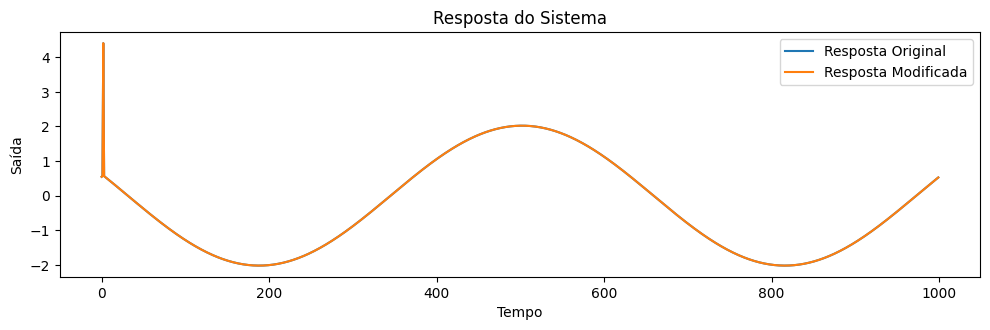

In [9]:
linearidade(sistema1)

O sistema é variável no tempo.


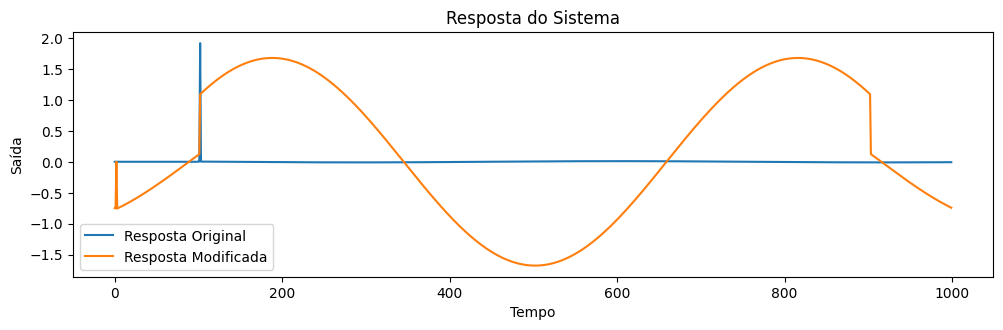

In [10]:
variancia(sistema1)

O sistema é com memória.


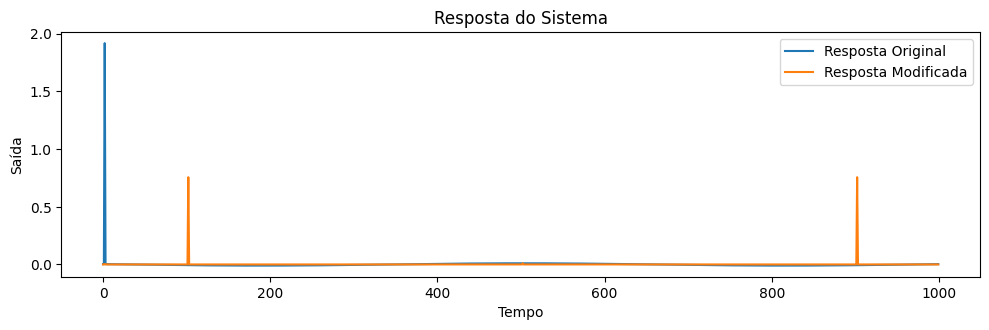

In [11]:
memoria(sistema1)

O sistema é antecipativo.


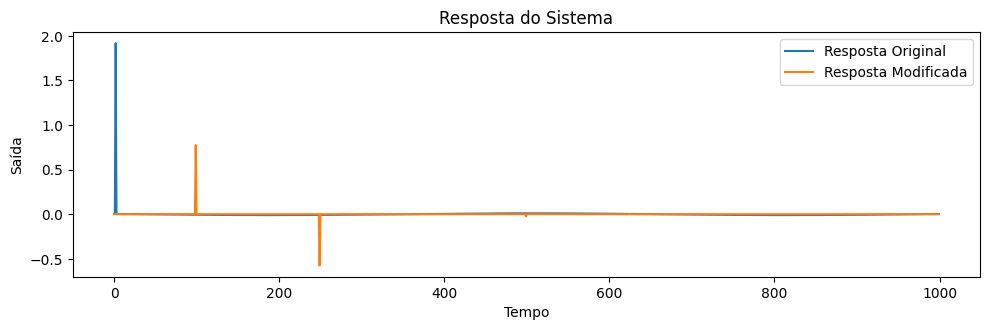

In [12]:
causalidade(sistema1)

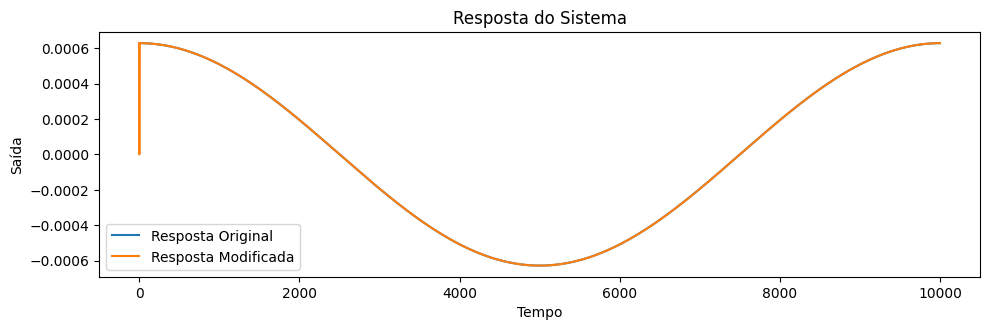

O sistema é estável.


In [13]:
estabilidade(sistema1)

- y(t) = cos(3t)x(t)

In [14]:
def sistema2(x):
    N = len(x)
    y = np.zeros(N)
    T = np.linspace(-5,5, 1000)
    for t in range(N):
            y[t] = np.cos(3*T[t]) * x[t]
    return y

O sistema é linear.


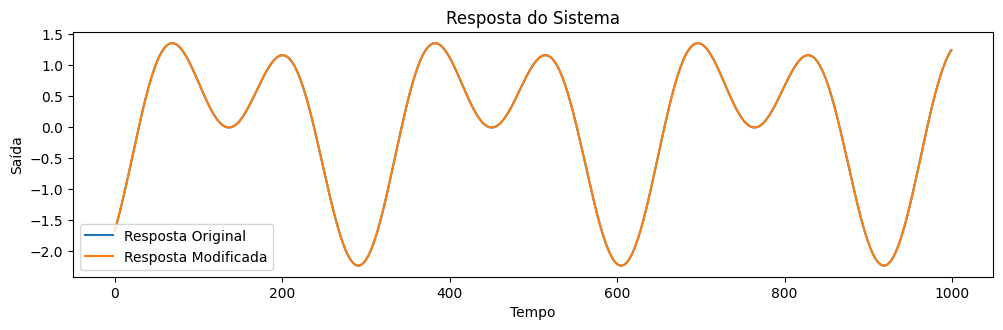

In [15]:
linearidade(sistema2)

O sistema é variável no tempo.


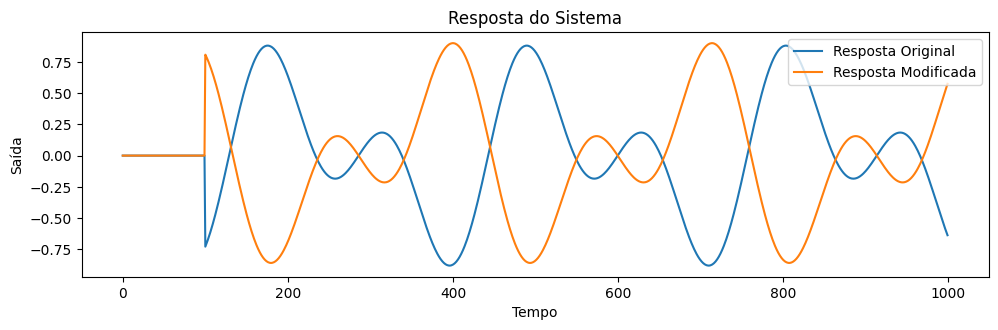

In [16]:
variancia(sistema2)

O sistema é sem memória.


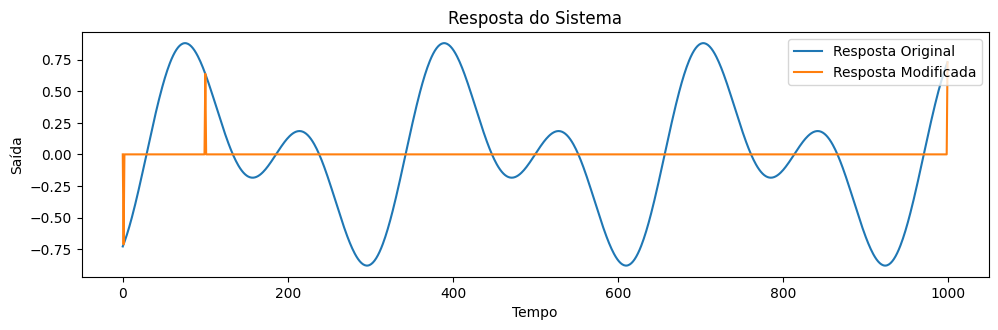

In [17]:
memoria(sistema2)

O sistema é causal.


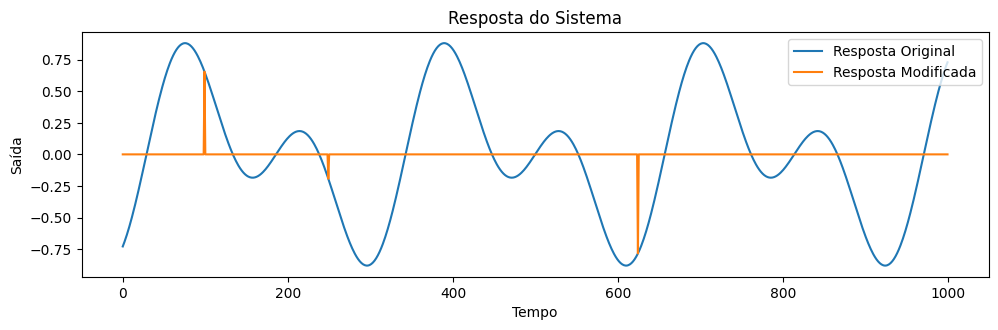

In [18]:
causalidade(sistema2)

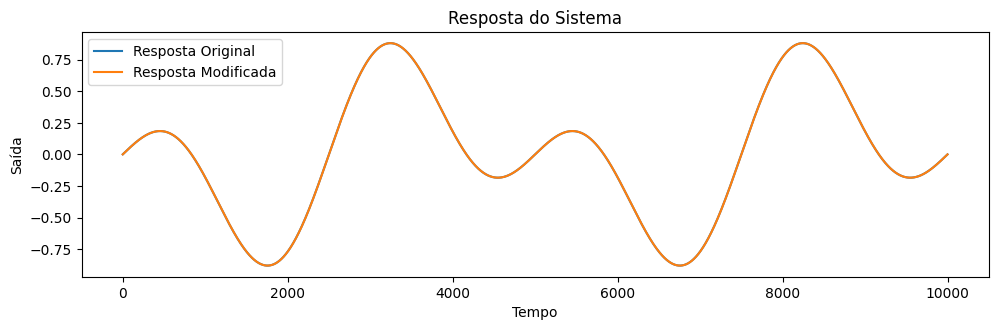

O sistema é estável.


In [19]:
def sistema2_1(x):
    N = len(x)
    y = np.zeros(N)
    T = np.linspace(0, 4 * np.pi,20000)
    for t in range(N):
            y[t] = np.cos(3*T[t]) * x[t]
    return y
estabilidade(sistema2_1)

 - y(t) = ∫ 
[−∞
2t] ​x(t)dτ

In [20]:
def sistema3(x):
    N = len(x)
    y = np.zeros(N)
    T = np.linspace(-5, 5, N)
    for t in range(N):
        integral_value = 0.0
        tau_values = np.linspace(-5, 2 * T[t], 1000)
        delta_tau = tau_values[1] - tau_values[0]
        for tau in tau_values:
            integral_value += x[np.abs(T - tau).argmin()] * delta_tau
        y[t] = integral_value
    return y

O sistema é com memória.


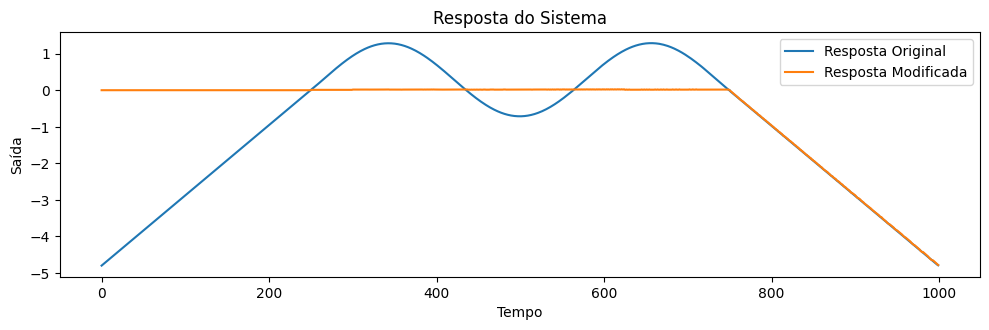

In [21]:
memoria(sistema3)

O sistema é variável no tempo.


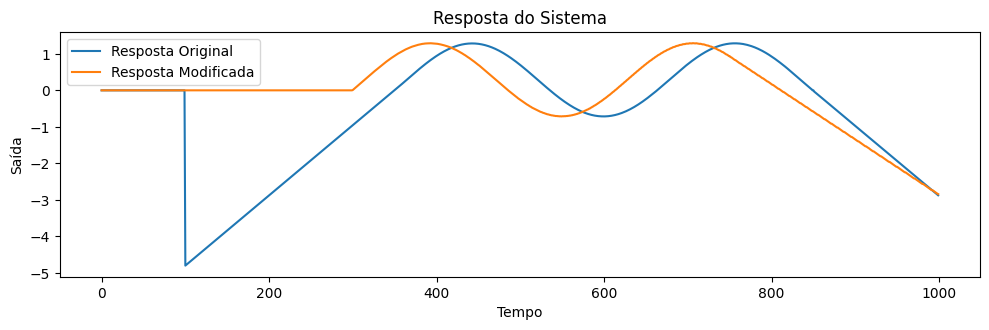

In [22]:
variancia(sistema3)

O sistema é linear.


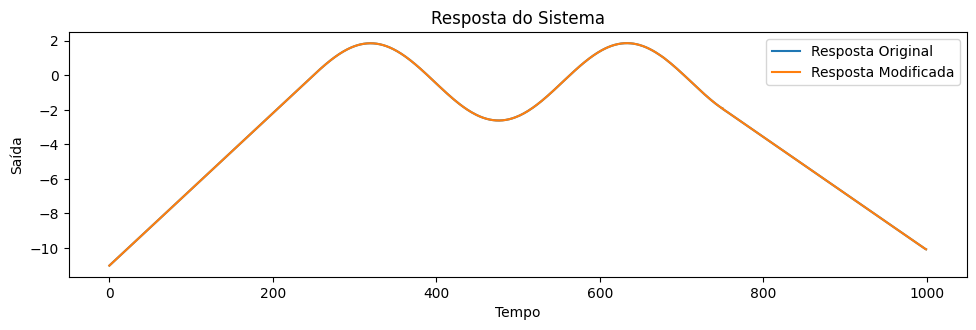

In [23]:
linearidade(sistema3)

O sistema é antecipativo.


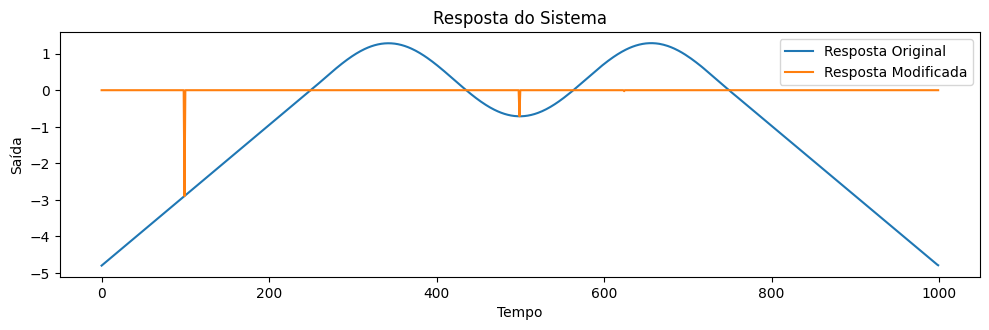

In [24]:
causalidade(sistema3)

- x(t) =
{x(t) + x(t − 2), t ≥ 0 } {  0, t < 0 }

In [25]:
def sistema4(x):
    N = len(x)
    y = np.zeros(N)
    T = np.linspace(-5,5, 1000)
    for t in range(N):
        if(t>=0):
            y[t] = x[t] + x[t-2]
        else:
            y[t] = 0
    return y

O sistema é com memória.


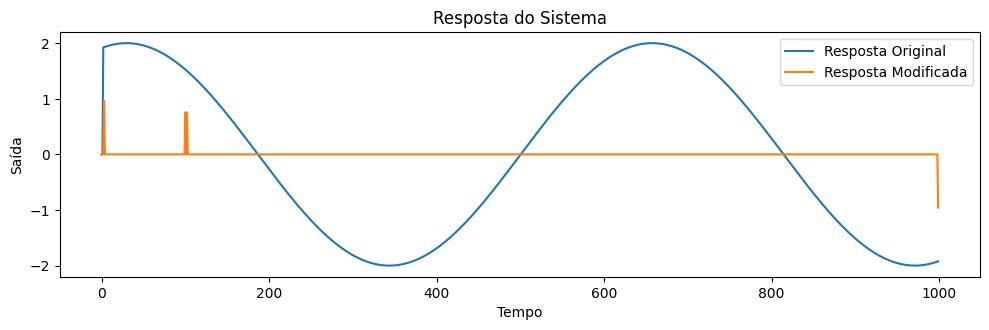

In [26]:
memoria(sistema4)

O sistema é antecipativo.


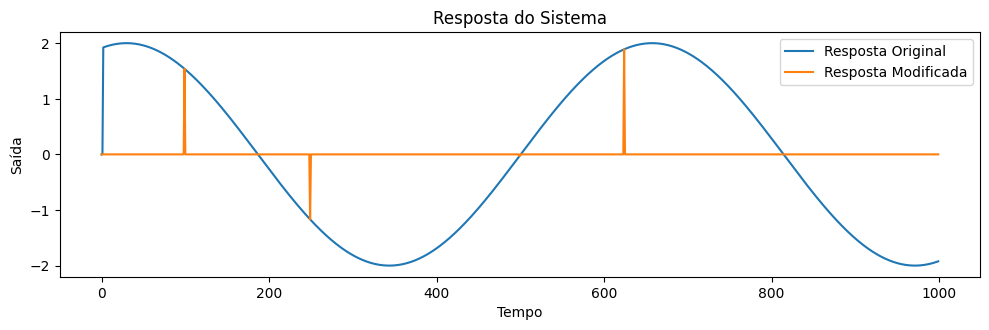

In [27]:
causalidade(sistema4)

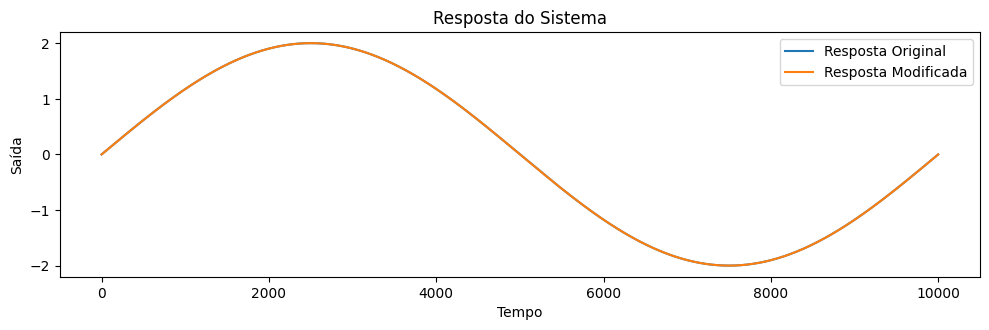

O sistema é estável.


In [28]:
estabilidade(sistema4)

O sistema é linear.


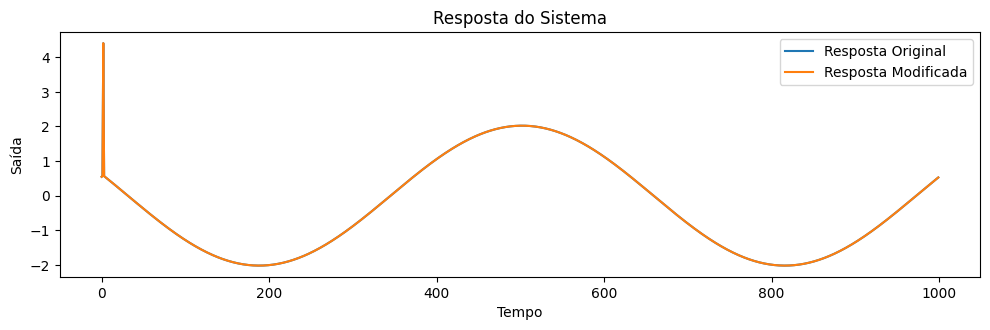

In [29]:
linearidade(sistema1)

O sistema é variável no tempo.


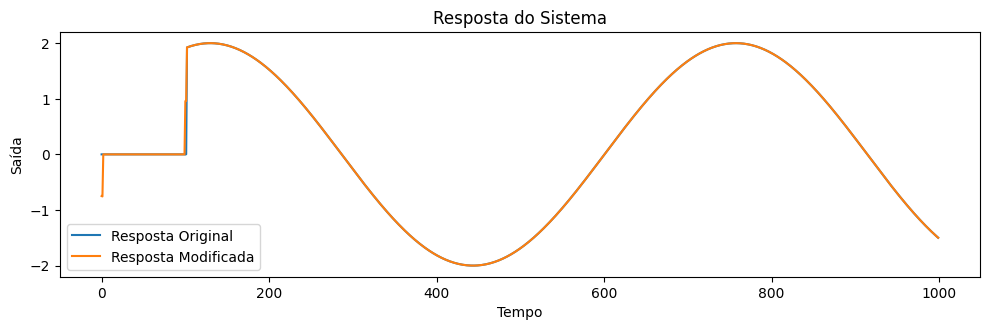

In [36]:
variancia(sistema4)

- x(t) =
{x(t) + x(t − 2), x(t) ≥ 0 } {  0, x(t) < 0 }

In [30]:
def sistema5(x):
    N = len(x)
    y = np.zeros(N)
    T = np.linspace(-5,5, 1000)
    for t in range(N):
        if(x[t]>=0):
            y[t] = x[t] + x[t-2]
        else:
            y[t] = 0
    return y

O sistema é com memória.


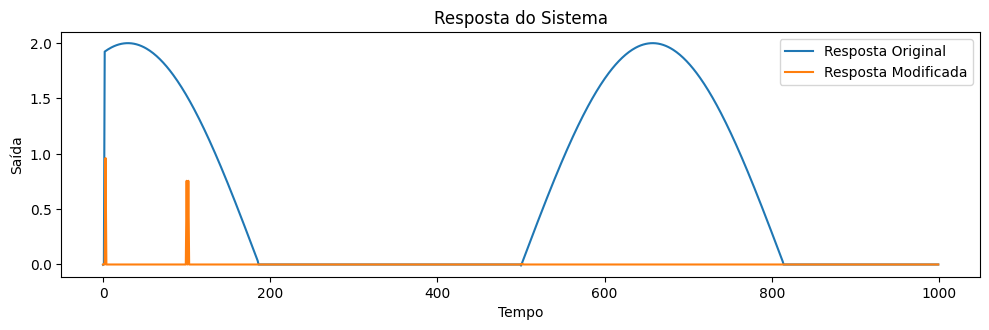

In [31]:
memoria(sistema5)

O sistema é antecipativo.


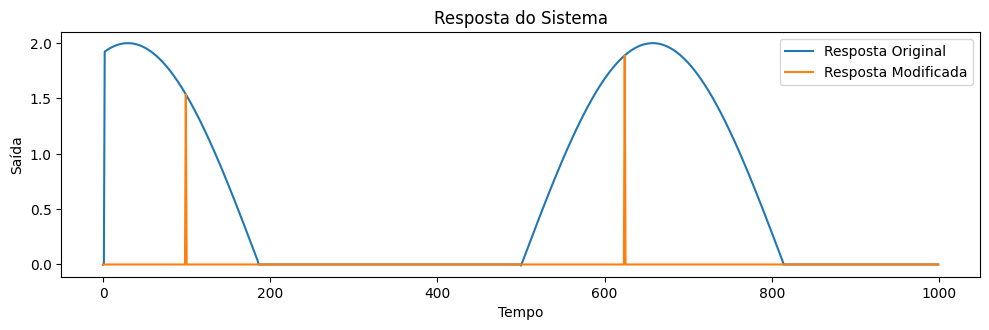

In [32]:
causalidade(sistema5)

O sistema é variável no tempo.


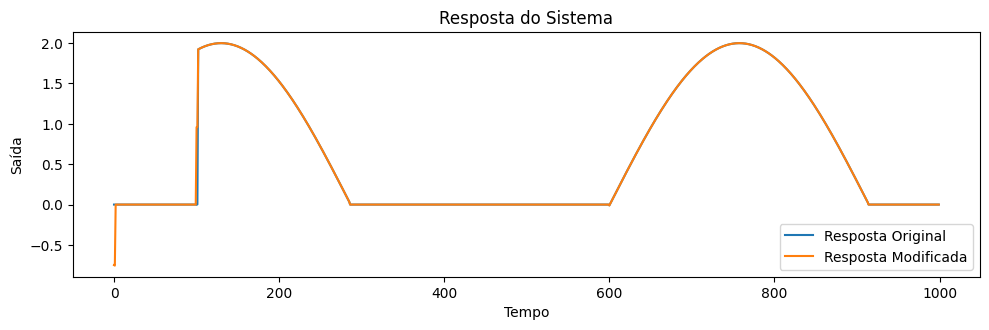

In [33]:
variancia(sistema5)

O sistema não é linear.


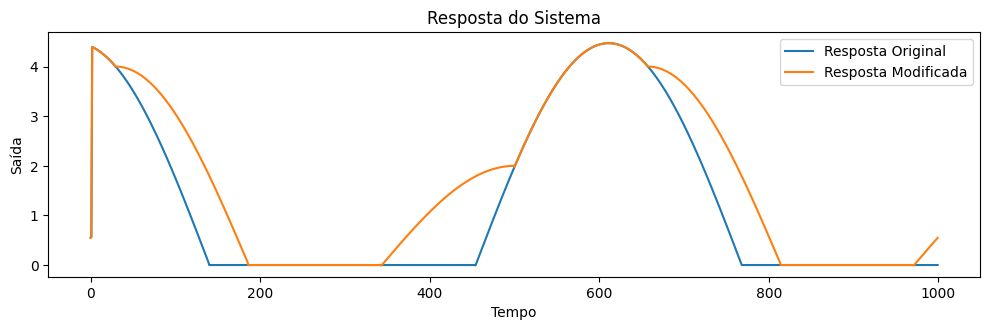

In [34]:
linearidade(sistema5)

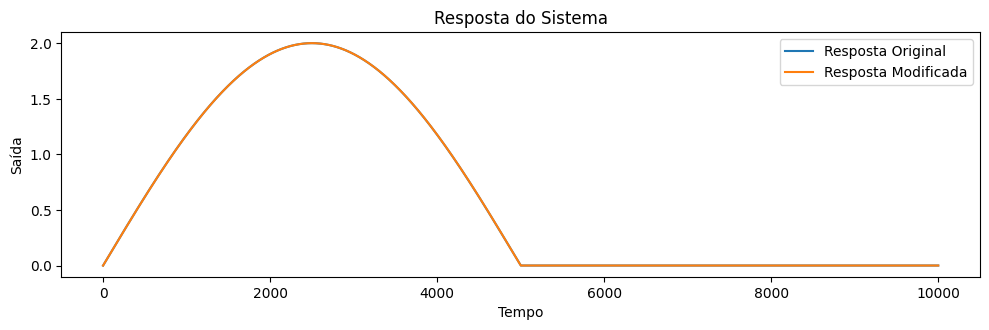

O sistema é estável.


In [35]:
estabilidade(sistema5)

#### Segunda Parte

Neste problema, estamos interessados em verificar os efeitos de um tipo de sistema bastante comum e importante
no mundo real: sistemas lineares e invariantes no tempo, ou LTI. A principal importância de sistemas com essas
duas características simultâneas é que depois que conhecemos a resposta de um sistema LTI a uma entrada, é
possível computar diretamente as respostas a muitos outros sinais de entrada

- Item A

In [74]:
def sistema(x):
    y = np.zeros_like(x)
    for i, val in enumerate(x):
        if val >= 0 and val <= 2:
            if val <= 1:
                y[i] = val * 2
            else:
                y[i] = (2 - val)*2
    return y

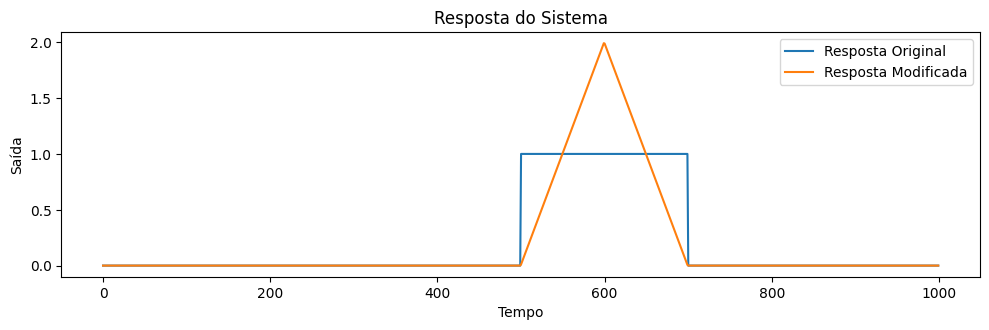

In [75]:
t = np.linspace(-5, 5, 1000)
x1 = np.where((t >= 0) & (t <= 2), 1, 0)
y1 = sistema(t) * x1
plotar(x1,y1)

- Item C

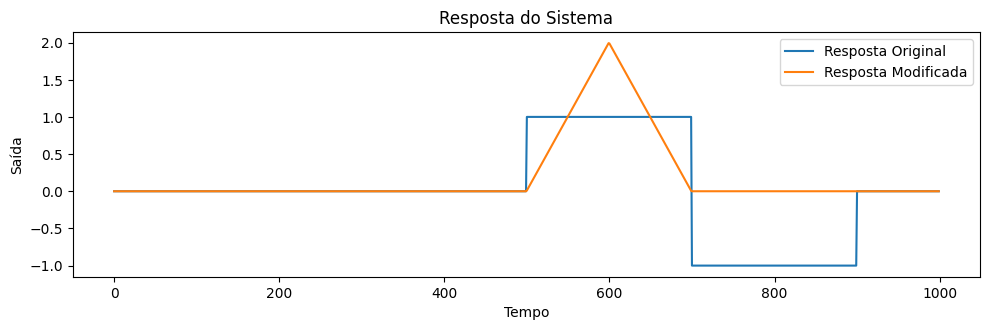

In [79]:
x2 = np.where((t >= 0) & (t <= 2), 1, 0)
x3 = np.where((t >2) & (t <=4), -1, 0)
x2 = x2+x3
y2 = sistema(t) * x2
plotar(x,y2)

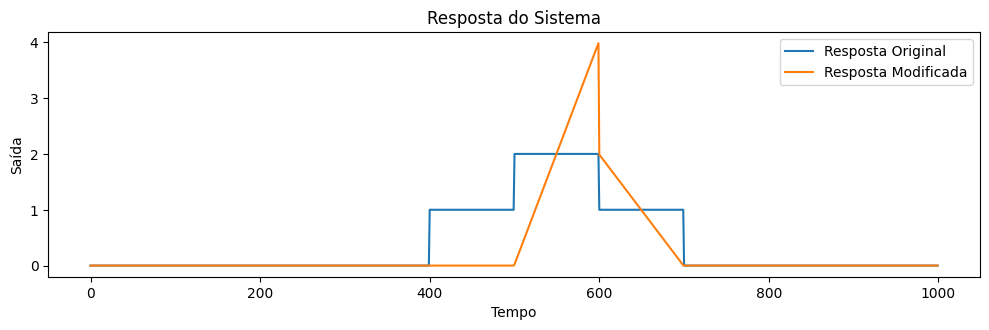

In [81]:
x0 = np.where((t >= -1) & (t <= 0), 1, 0)
x1 = np.where((t >= 0) & (t <= 1), 2, 0)
x2 = np.where((t >= 1) & (t <= 2), 1, 0)
x3 = x0+x1+x2
y3 = sistema(t) * x3
plotar(x3,y3)